# Dominant color picker from a image using K-Means Algorithm

In [44]:
import cv2
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

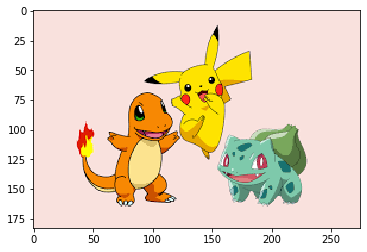

In [45]:
#reading image in RGB format
im = cv2.imread("data_set/dominant_color_picker/pokemon.png")
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.show()

In [46]:
#storing image pixels in an array
all_pixels = im.reshape((-1,3))
print(all_pixels.shape)

(50325, 3)


In [47]:
#Kmeans algorithm
dominant_colors = 8                  #take dominant colors input from user
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [66]:
centers = km.cluster_centers_
centers = np.array(centers,dtype="uint8")

hex_color = []
for i in range(len(centers)):
    tmp = '#%02x%02x%02x' % (centers[i][0],centers[i][1],centers[i][2])
    hex_color.append(tmp)
    
print(hex_color)

['#f08e02', '#f8e0dc', '#5e8460', '#fce300', '#86c0a7', '#362613', '#f6d78b', '#bb4d16']


# Plotting these colors

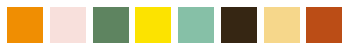

In [49]:
i = 1
plt.figure(0,figsize=(6,3))

colors = []

for each_col in centers:
    plt.subplot(1,dominant_colors,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
plt.show()

# Segmenting our original image

In [50]:
new_img = np.zeros((im.shape[0]*im.shape[1],3),dtype='uint8')
print(new_img.shape)

(50325, 3)


In [51]:
km.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

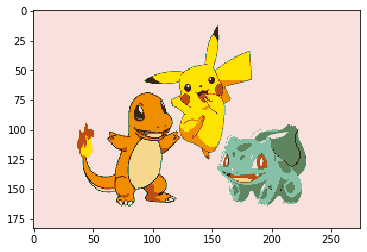

In [52]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]

new_img = new_img.reshape((im.shape))
plt.imshow(new_img)
plt.show()